<a href="https://colab.research.google.com/github/Clay-the-Great/day-99-data-science-fatal-force/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
# %pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('/content/drive/MyDrive/day-99-Fatal+Force/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('/content/drive/MyDrive/day-99-Fatal+Force/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('/content/drive/MyDrive/day-99-Fatal+Force/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('/content/drive/MyDrive/day-99-Fatal+Force/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('/content/drive/MyDrive/day-99-Fatal+Force/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_fatalities.shape

(2535, 14)

In [ ]:
df_fatalities.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2265,2523,Michael Wilson-Salzl,22/04/17,shot,knife,24.00,M,W,Hamilton,OH,True,other,Not fleeing,False


In [ ]:
df_fatalities.isna().values.any()

True

In [ ]:
df_fatalities.duplicated().values.any()

False

In [ ]:
df_share_race_city.shape

(29268, 7)

In [ ]:
df_share_race_city.sample()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
6603,IL,Hillsboro city,84.2,13.8,0.2,0.3,3.4


In [ ]:
df_share_race_city.isna().values.any()

False

In [ ]:
df_share_race_city.duplicated().values.any()

False

In [ ]:
df_pct_completed_hs.shape

(29329, 3)

In [ ]:
df_pct_completed_hs.sample()

,Geographic Area,City,percent_completed_hs
659,AK,Diamond Ridge CDP,97


In [ ]:
df_pct_completed_hs.isna().values.any()

False

In [ ]:
df_pct_completed_hs.duplicated().values.any()

False

In [ ]:
df_pct_poverty.shape

(29329, 3)

In [ ]:
df_pct_poverty.sample()

,Geographic Area,City,poverty_rate
16225,NJ,Pennsville CDP,12.3


In [ ]:
df_pct_poverty.isna().values.any()

False

In [ ]:
df_pct_poverty.duplicated().values.any()

False

In [ ]:
df_hh_income.shape

(29322, 3)

In [ ]:
df_hh_income.sample()

,Geographic Area,City,Median Income
28870,WI,Oxford village,44000


In [ ]:
df_hh_income.isna().values.any()

True

In [ ]:
df_hh_income.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
df_fatalities = df_fatalities.fillna(0)

In [ ]:
df_fatalities.isna().values.any()

False

In [ ]:
df_hh_income = df_hh_income.fillna(0)

In [ ]:
df_hh_income.isna().values.any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.sample()

,Geographic Area,City,poverty_rate
18990,ND,Larson CDP,0


In [ ]:
df_pct_poverty = df_pct_poverty.sort_values("poverty_rate", ascending=False)

In [ ]:
df_pct_poverty.dtypes

Geographic Area    object
City               object
poverty_rate       object
dtype: object

In [ ]:
df_pct_poverty = df_pct_poverty[df_pct_poverty["poverty_rate"] != "-"]

In [ ]:
df_pct_poverty.shape[0]

29128

In [ ]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].astype(float)

In [ ]:
df_pct_poverty.dtypes

Geographic Area     object
City                object
poverty_rate       float64
dtype: object

In [ ]:
poverty_rate_by_state = df_pct_poverty.groupby("Geographic Area").poverty_rate.agg(["mean"]).rename_axis("state").reset_index()

In [ ]:
poverty_rate_by_state = poverty_rate_by_state.rename(columns={"mean": "poverty_rate"})

In [ ]:
poverty_rate_by_state.shape[0]

51

In [ ]:
poverty_rate_by_state = poverty_rate_by_state.sort_values("poverty_rate", ascending=False)

In [ ]:
poverty_rate_by_state.sample()

,state,poverty_rate
28,ND,12.16


In [ ]:
h_bar = px.bar(
    data_frame=poverty_rate_by_state, 
    x=poverty_rate_by_state["poverty_rate"], 
    y=poverty_rate_by_state.state, 
    orientation='h', 
    color="state", 
    hover_name="state",
    title='Poverty Rate by State'
    )
h_bar.update_layout(xaxis_title='Poverty Rate (%)', yaxis_title='State')
h_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs.sample()

,Geographic Area,City,percent_completed_hs
19724,OH,Lakemore village,88.7


In [ ]:
df_pct_completed_hs.dtypes

Geographic Area         object
City                    object
percent_completed_hs    object
dtype: object

In [ ]:
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs["percent_completed_hs"] != "-"]

In [ ]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].astype(float)

<ipython-input-46-457aa6a6cc6a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_pct_completed_hs.dtypes

Geographic Area          object
City                     object
percent_completed_hs    float64
dtype: object

In [ ]:
hs_completion_by_state = df_pct_completed_hs.groupby("Geographic Area").percent_completed_hs.agg(["mean"]).rename_axis("state").reset_index()

In [ ]:
hs_completion_by_state.rename(columns={"mean": "completion_rate"}, inplace=True)

In [ ]:
hs_completion_by_state.sample()

,state,completion_rate
22,MI,89.21


In [ ]:
hs_completion_by_state.sort_values("completion_rate", ascending=True, inplace=True)

In [ ]:
h_bar = px.bar(
    data_frame=hs_completion_by_state, 
    x=hs_completion_by_state["completion_rate"], 
    y=hs_completion_by_state.state, 
    orientation='h', 
    color="state", 
    hover_name="state",
    title='High School Completion Rate by State'
    )
h_bar.update_layout(xaxis_title='Hight School Completion Rate (%)', yaxis_title='State')
h_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
poverty_rate_by_state.sample()

,state,poverty_rate
41,SD,16.03


In [ ]:
hs_completion_by_state.sample()

,state,completion_rate
7,DC,89.30


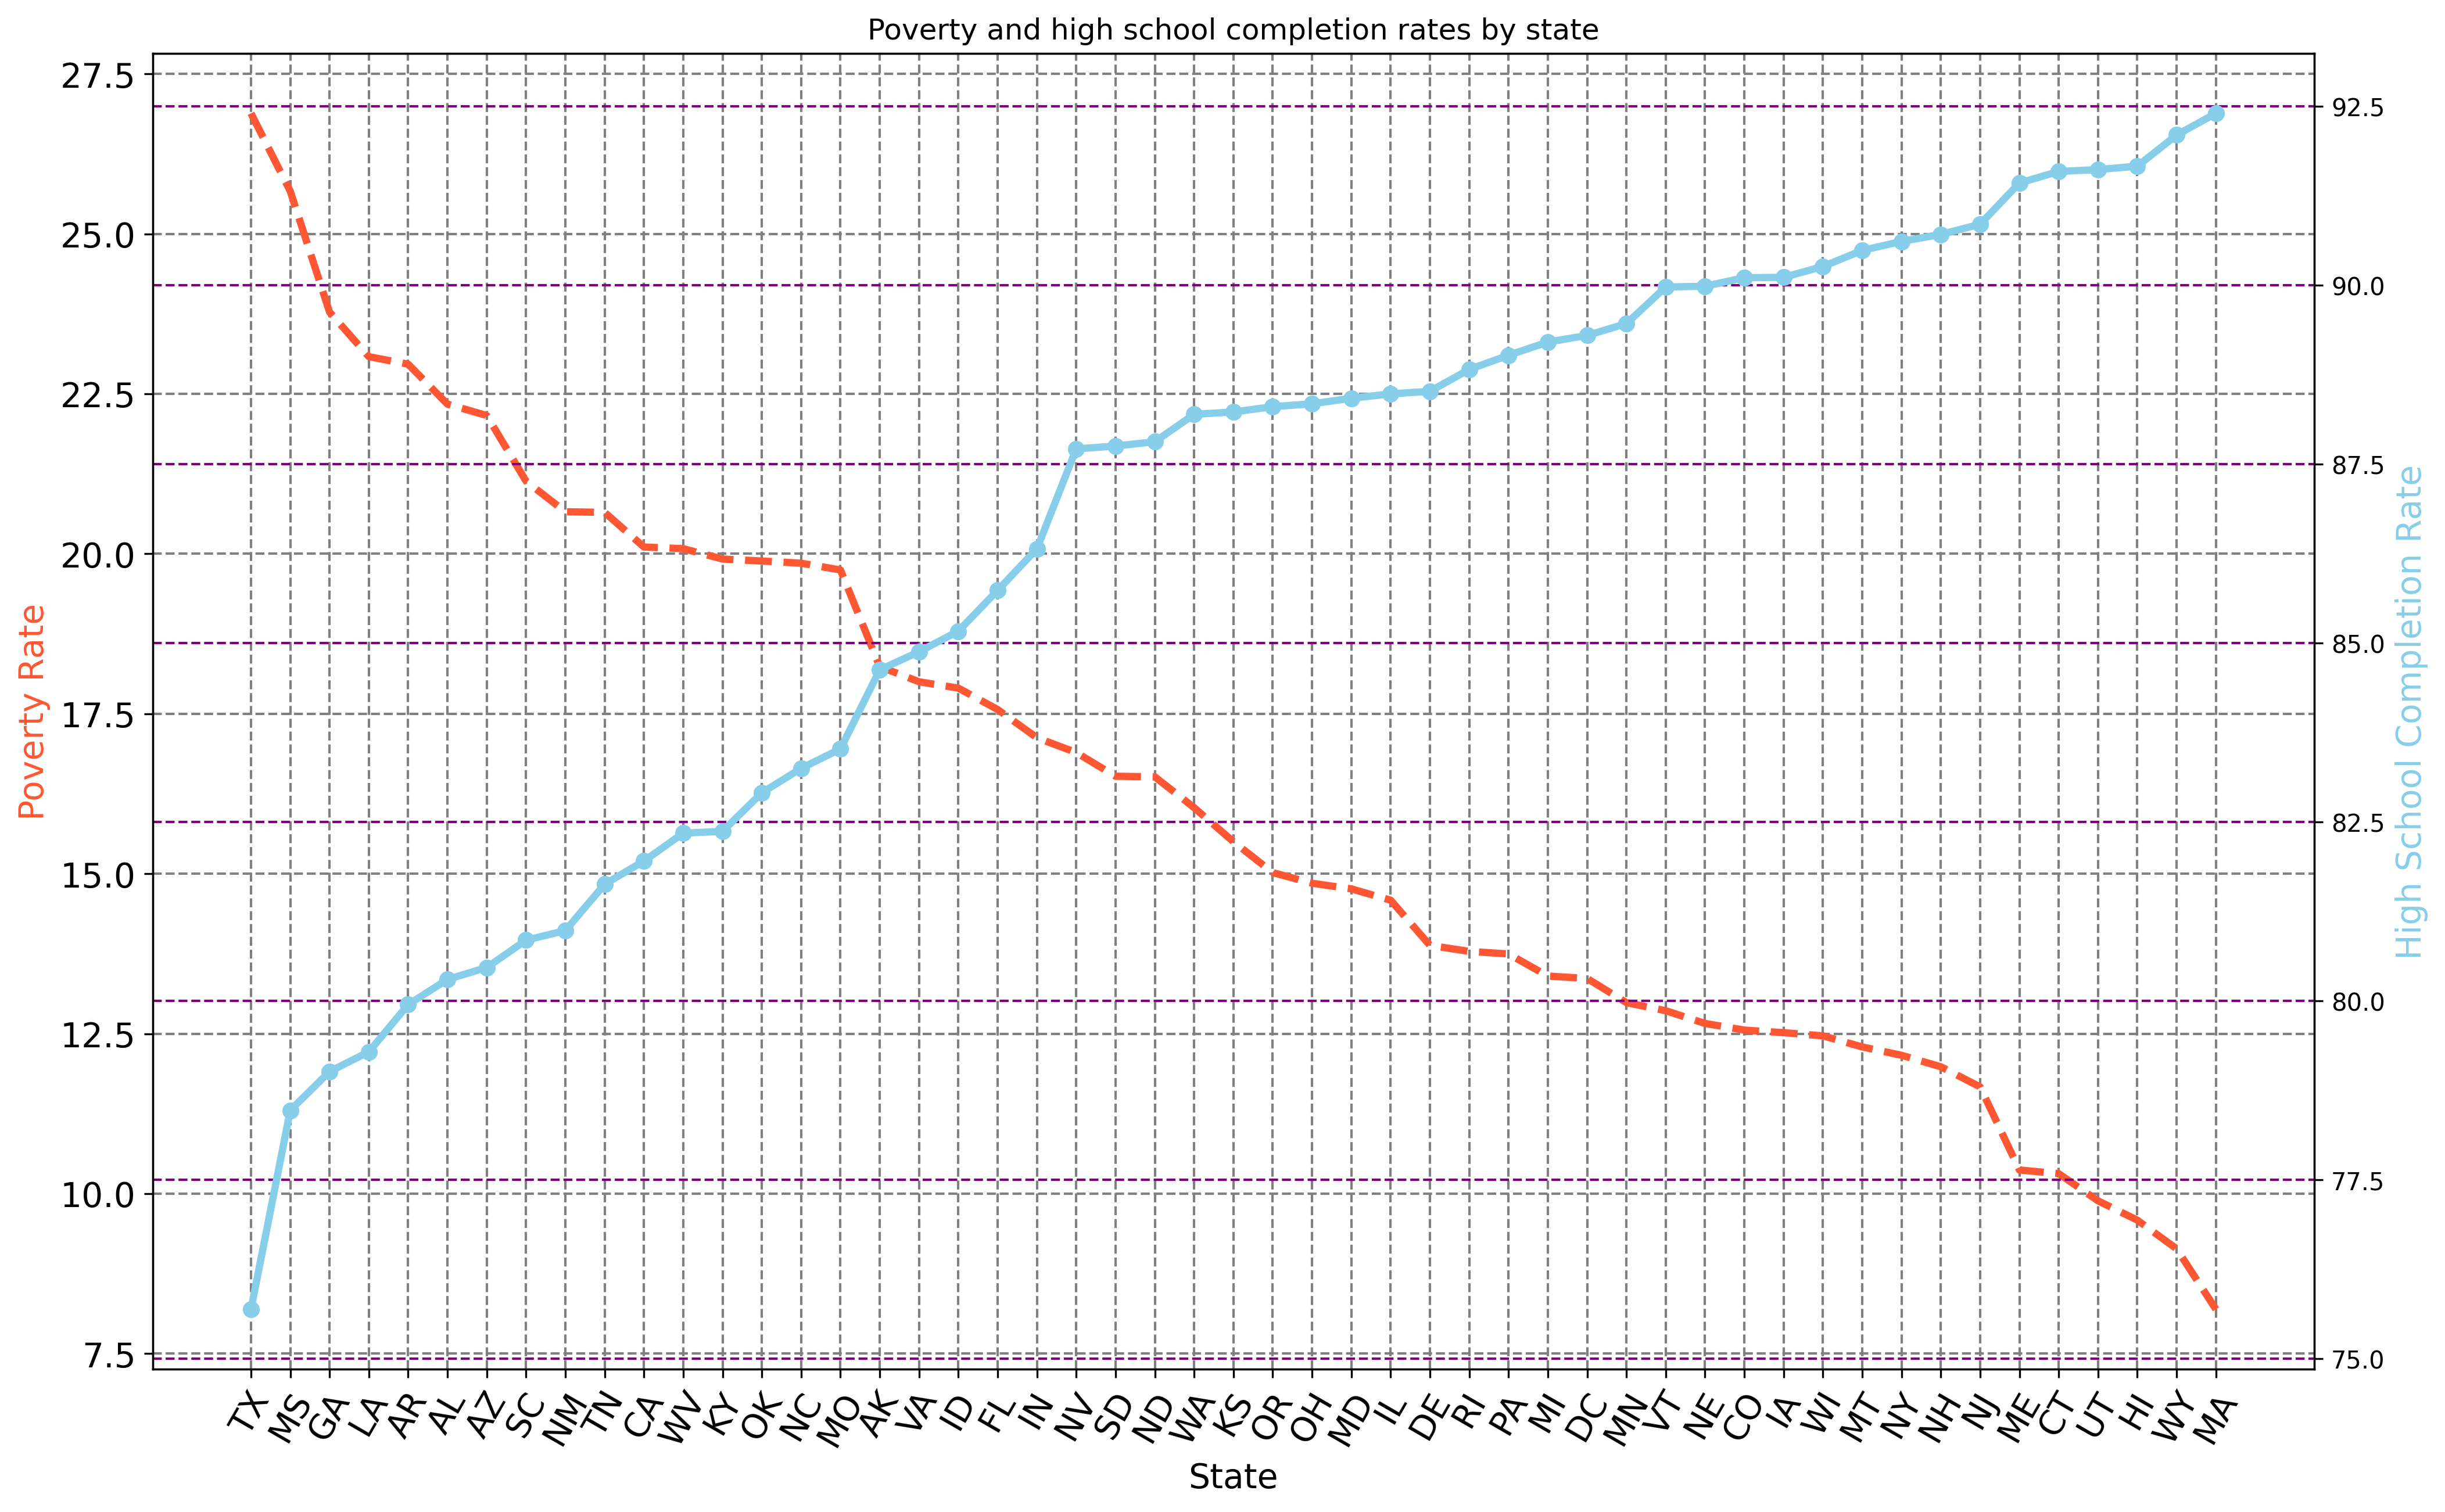

In [ ]:
plt.figure(figsize=(16,10), dpi=300) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=60)
plt.title("Poverty and high school completion rates by state")

axis1 = plt.gca() # get current axes
axis2 = axis1.twinx() 

axis1.plot(poverty_rate_by_state["state"], poverty_rate_by_state["poverty_rate"], linewidth=3, color="#FF5733", linestyle="--", label="Poverty rate")
axis2.plot(hs_completion_by_state["state"], hs_completion_by_state["completion_rate"], linewidth=3, color="skyblue", marker="o", label="High school rate")
axis1.set_xlabel("State", fontsize=14)
axis1.set_ylabel("Poverty Rate", color="#FF5733", fontsize=14)
axis2.set_ylabel("High School Completion Rate", color="skyblue", fontsize=14)
# axis1.set_ylim(0, 15)
# axis2.set_ylim(0, 110)
# axis1.set_xlim(df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max())

axis1.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='grey')
axis2.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='purple')
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
merged_df = pd.merge(poverty_rate_by_state, hs_completion_by_state, on="state")

In [ ]:
merged_df.sample()

,state,poverty_rate,completion_rate
1,AZ,25.67,80.47


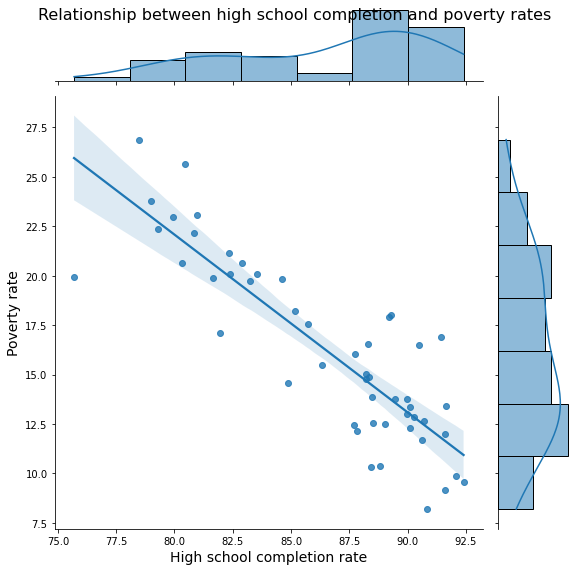

In [ ]:
axes = sns.jointplot(data=merged_df, x='completion_rate', y='poverty_rate', height=8, kind="reg")
axes.fig.suptitle("Relationship between high school completion and poverty rates", fontsize=16)
axes.set_axis_labels('High school completion rate', 'Poverty rate', fontsize=14)  
plt.show()

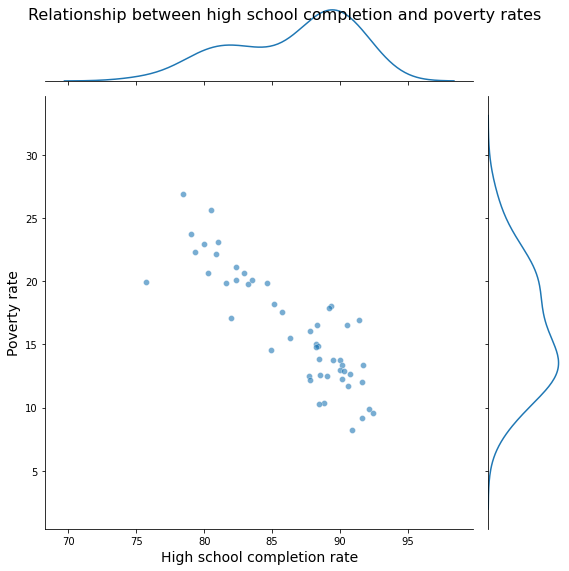

In [ ]:
g = sns.JointGrid(data=merged_df, 
                  x="completion_rate",
                  y="poverty_rate",
                  height=8, 
                  ratio=5)
g.plot_joint(sns.scatterplot, alpha=.6)
g.plot_marginals(sns.kdeplot)
g.fig.suptitle("Relationship between high school completion and poverty rates", fontsize=16)
g.set_axis_labels('High school completion rate', 'Poverty rate', fontsize=14)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

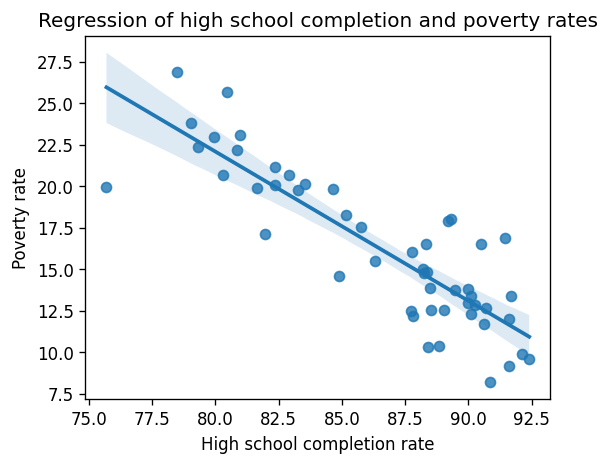

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
axes = sns.regplot(data=merged_df, x='completion_rate', y='poverty_rate')
plt.xlabel("High school completion rate", fontsize=10)
plt.ylabel("Poverty rate", fontsize=10)
plt.title("Regression of high school completion and poverty rates", fontsize=12)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
df_share_race_city.sample()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
7861,IN,North Judson town,96.7,0.1,0.3,0.2,7.3


In [ ]:
df_share_race_city.dtypes

Geographic area          object
City                     object
share_white              object
share_black              object
share_native_american    object
share_asian              object
share_hispanic           object
dtype: object

In [ ]:
(df_share_race_city["share_white"] == "(X)").values.any()

True

In [ ]:
df_share_race_city.replace("(X)", "0", inplace=True)

In [ ]:
(df_share_race_city["share_white"] == "(X)").values.any()

False

In [ ]:
df_share_race_city[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]] = df_share_race_city[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]].astype(float)

In [ ]:
df_share_race_city.dtypes

Geographic area           object
City                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object

In [ ]:
df_share_race_city.sample()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
9606,KS,Plains city,88.10,0.30,1.00,0.40,36.00


In [ ]:
race_share_by_state = df_share_race_city.groupby("Geographic area")[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]].agg(white=('share_white', 'mean'), black=("share_black", "mean"), native=("share_native_american", "mean"), asian=("share_asian", "mean"), hispanic=("share_hispanic", "mean")).reset_index()

In [ ]:
# race_share_by_state = df_share_race_city.groupby("Geographic area")[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]].agg(["mean"]).rename_axis(["state"]).reset_index()

In [ ]:
race_share_by_state = race_share_by_state.rename(columns={"Geographic area": "state"})

In [ ]:
race_share_by_state.sample()

,state,white,black,native,asian,hispanic
20,MD,72.12,19.46,0.34,2.98,5.93


In [ ]:
race_share_by_state["total"] = race_share_by_state.white + race_share_by_state.black + race_share_by_state.native + race_share_by_state.asian + race_share_by_state.hispanic

In [ ]:
race_share_by_state["white"] = race_share_by_state.white / race_share_by_state.total *100

In [ ]:
race_share_by_state["black"] = race_share_by_state["black"] / race_share_by_state["total"] * 100

In [ ]:
race_share_by_state["native"] = race_share_by_state["native"] / race_share_by_state["total"] * 100

In [ ]:
race_share_by_state["asian"] = race_share_by_state["asian"] / race_share_by_state["total"] * 100

In [ ]:
race_share_by_state["hispanic"] = race_share_by_state["hispanic"] / race_share_by_state["total"] * 100

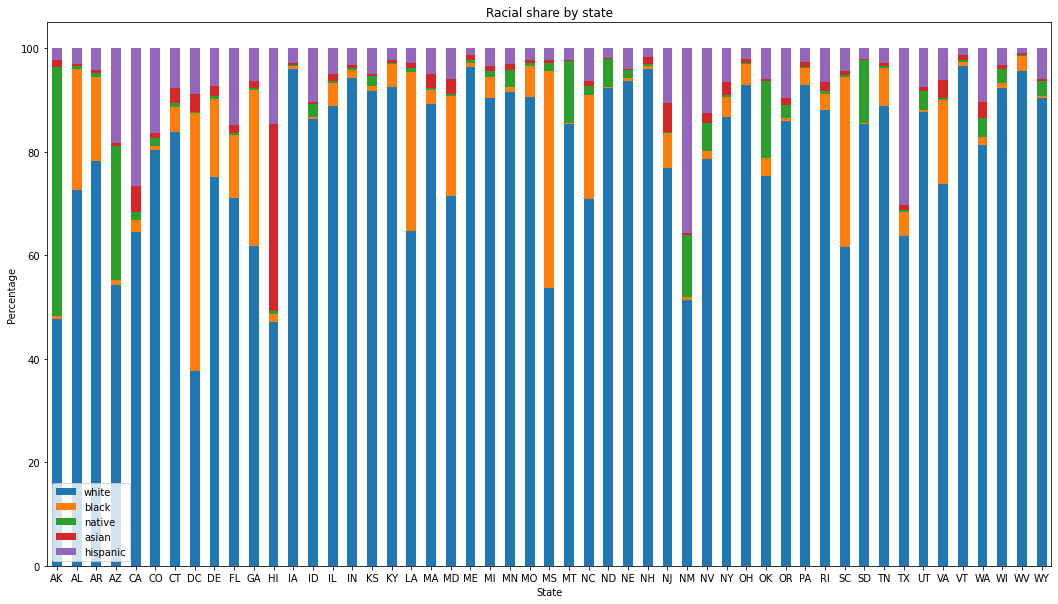

In [ ]:
ax = race_share_by_state.plot(x="state", y=["white", "black", "native", "asian", "hispanic"],
                         kind="bar", rot=0, stacked=True, figsize=(18, 10),
                         title="Racial share by state")
ax.set_ylabel("Percentage")
ax.set_xlabel("State")
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1705,1910,Cody Lafont,25/09/16,shot,gun,25.00,M,W,Claremont,NH,True,other,Not fleeing,False


In [ ]:
killed_people_by_race = df_fatalities.groupby("race").name.agg(["count"]).reset_index()

In [ ]:
fig = px.pie(killed_people_by_race, values='count', names='race', title='People killed by police per race', hole=0.4)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
deaths_by_gender = df_fatalities.groupby("gender").name.agg(["count"]).reset_index()

In [ ]:
deaths_by_gender

,gender,count
0,F,107
1,M,2428


In [ ]:
fig = px.pie(deaths_by_gender, values='count', names='gender', title='People killed by police per gender')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
df_fatalities.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2229,2483,Austin Dakota Snyder,05/04/17,shot,vehicle,22.00,M,W,Little Rock,AR,False,other,0,False


In [ ]:
df_fatalities = df_fatalities[df_fatalities["age"] != 0]

In [ ]:
df_fatalities.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

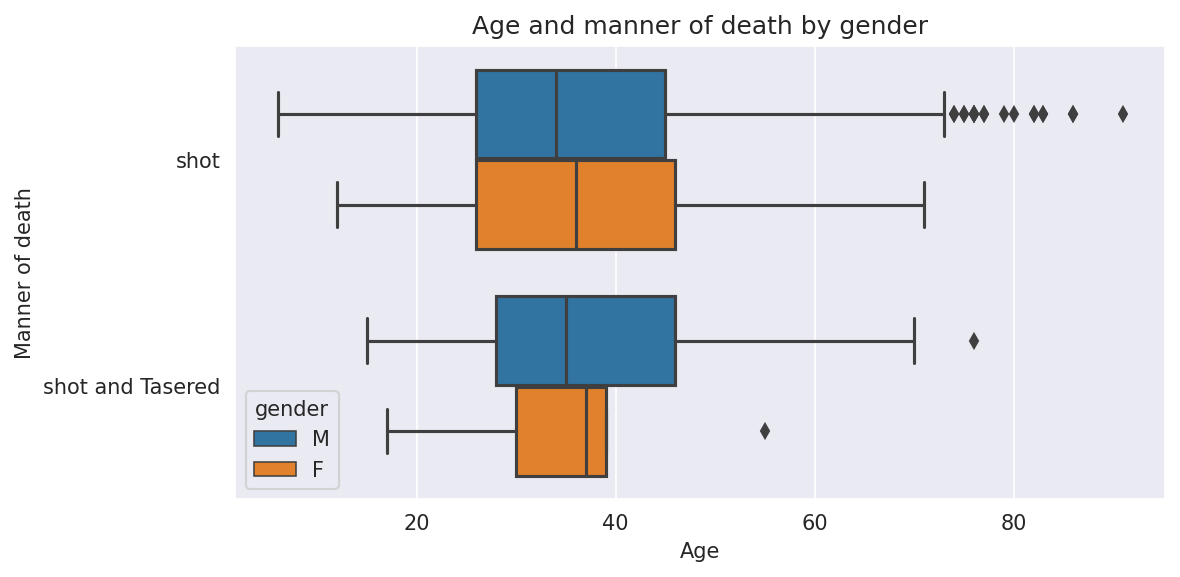

In [ ]:
plt.figure(figsize=(8, 4), dpi=150)
with sns.axes_style("darkgrid"):
  sns.boxplot(data=df_fatalities, x="age", y="manner_of_death", hue="gender",)
  plt.xlabel("Age")
  plt.ylabel("Manner of death")
  plt.title("Age and manner of death by gender")
plt.show()

In [ ]:
box = px.box(df_fatalities, x="age", y="manner_of_death", color="gender", points="all", notched=True)
box.update_layout(title="Age and manner of death by gender",
                   yaxis_title="Manner of death",
                  xaxis_title="Age")
box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
deaths_by_weapon = df_fatalities.groupby("armed").name.agg(["count"]).reset_index()

In [ ]:
deaths_by_weapon.sample()

,armed,count
40,metal pipe,7


In [ ]:
# Represent only large weapon categories
deaths_by_weapon.loc[deaths_by_weapon["count"] < 100, "armed"] = "other"

In [ ]:
fig = px.pie(deaths_by_weapon, values='count', names='armed', title='Weapon carried when killed', hole=0.4,
             hover_data=["armed"])
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
df_fatalities["under_25"] = np.where(df_fatalities["age"] <= 25, True, False)

In [ ]:
df_fatalities.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,under_25
2494,2779,Justine Damond,15/07/17,shot,unarmed,40.00,F,W,Minneapolis,MN,False,undetermined,Not fleeing,False,False


In [ ]:
young_deaths = df_fatalities.groupby("under_25").name.agg(["count"]).reset_index()

In [ ]:
fig = px.pie(young_deaths, values='count', names='under_25', title='Percentage of deaths under 25 years of age', hole=0.4)
fig.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

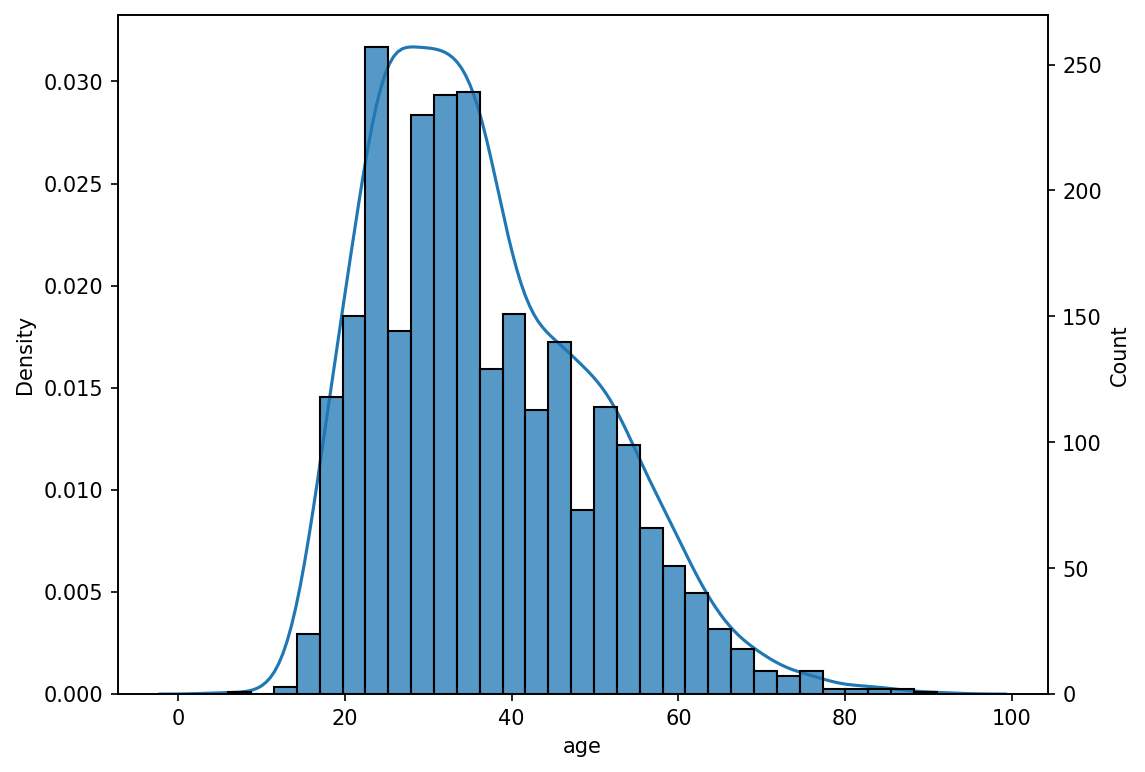

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=150)
sns.kdeplot(data=df_fatalities, x="age", ax=ax)
ax2 = ax.twinx()
sns.histplot(data=df_fatalities, x="age", ax=ax2)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

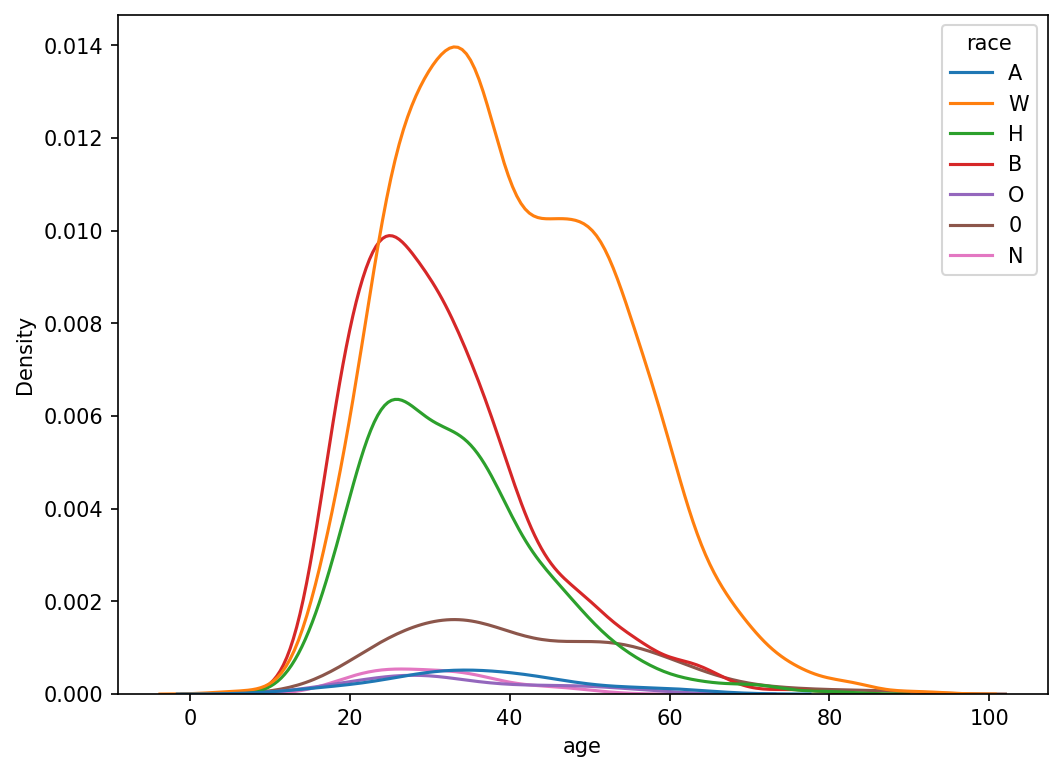

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=150)
sns.kdeplot(data=df_fatalities, x="age", hue="race", ax=ax)
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
deaths_by_race = df_fatalities.groupby("race").name.agg(["count"]).reset_index()

In [ ]:
deaths_by_race.loc[deaths_by_race["race"] == "W", "race"] = "White"
deaths_by_race.loc[deaths_by_race["race"] == "B", "race"] = "Black"

In [ ]:
fig = px.pie(deaths_by_race, values='count', names='race', title='Percentage of deaths by race', hole=0.4)
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
deaths_by_mental_condition = df_fatalities.groupby("signs_of_mental_illness").name.agg(["count"]).reset_index()

In [ ]:
deaths_by_mental_condition.sample()

,signs_of_mental_illness,count
0,False,1839


In [ ]:
fig = px.pie(deaths_by_mental_condition, values='count', names='signs_of_mental_illness', title='Percentage of deaths by presence of mental illness', hole=0.4)
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
top_ten_cities = df_fatalities.groupby("city").name.agg(["count"]).reset_index().sort_values("count", ascending=False).head(10)

In [ ]:
top_ten_cities

,city,count
710,Los Angeles,37
967,Phoenix,30
559,Houston,26
233,Chicago,25
667,Las Vegas,19
59,Austin,18
275,Columbus,18
1087,San Antonio,17
785,Miami,17
1184,St. Louis,15


In [ ]:
h_bar = px.bar(
    data_frame=top_ten_cities, 
    x=top_ten_cities["count"], 
    y=top_ten_cities.city, 
    orientation='h', 
    color="city", 
    hover_name="city",
    # title='Top 10 cities by kills by police',
    title="Top 10 most deadly cities"
    )
h_bar.update_layout(xaxis_title='Number of deaths by police', yaxis_title='City')
h_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
# This question seems to be mathematically infeasible as we don't have the total population of each city.
# Therefore, I'll just calculate the share of each race in the police killings in the top ten cities.

In [ ]:
top_ten_cities_race = df_fatalities.groupby(["city", "race"]).name.agg(["count"]).reset_index().sort_values("count", ascending=False)

In [ ]:
top_ten_cities_race = top_ten_cities_race[top_ten_cities_race["city"].isin(top_ten_cities["city"])]

In [ ]:
top_ten_cities_race.city.value_counts()

Houston        6
Los Angeles    5
Phoenix        5
Chicago        4
Columbus       4
Las Vegas      4
Austin         3
San Antonio    3
St. Louis      3
Miami          3
Name: city, dtype: int64

In [ ]:
top_ten_cities.rename(columns={"count": "city_total"})

,city,city_total
710,Los Angeles,37
967,Phoenix,30
559,Houston,26
233,Chicago,25
667,Las Vegas,19
59,Austin,18
275,Columbus,18
1087,San Antonio,17
785,Miami,17
1184,St. Louis,15


In [ ]:
top_ten_cities_race = top_ten_cities_race.merge(top_ten_cities, on="city")

In [ ]:
top_ten_cities_race.sample()

,city,race,count_x,count_y
12,Houston,N,1,26


In [ ]:
top_ten_cities_race["race_share"] = top_ten_cities_race["count_x"] / top_ten_cities_race["count_y"] * 100

In [ ]:
top_ten_cities_race.sort_values("count_y", inplace=True, ascending=True)

In [ ]:
top_ten_cities_race.rename(inplace=True, columns={"count_x": "race_deaths", "count_y": "total_deaths"})

In [ ]:
top_ten_cities_race[top_ten_cities_race.city == "Miami"]

,city,race,race_deaths,total_deaths,race_share
39,Miami,W,3,17,17.65
38,Miami,H,6,17,35.29
37,Miami,B,8,17,47.06


In [ ]:
top_ten_cities_race.race.value_counts()

B    10
W    10
H     8
0     7
A     2
N     2
O     1
Name: race, dtype: int64

In [ ]:
h_bar = px.bar(
    data_frame=top_ten_cities_race, 
    x=top_ten_cities_race["race_deaths"], 
    y=top_ten_cities_race.city, 
    orientation='h', 
    color="race", 
    hover_data=["city", "race_share", "total_deaths"],
    title="Deaths by race in Top 10 most deadly cities"
    )
h_bar.update_layout(xaxis_title='Number of deaths', yaxis_title='City')
h_bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
deaths_by_state = df_fatalities.groupby("state").name.agg(["count"]).reset_index()

In [ ]:
deaths_by_state.sample()

,state,count
30,NH,7


In [ ]:
fig = px.choropleth(locations=deaths_by_state["state"], locationmode="USA-states", 
                    color=deaths_by_state["count"], scope="usa",
                    title="Police kills by state",)
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [ ]:
df_fatalities.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,under_25
1520,1709,Richard G. Dinneny,13/07/16,shot,toy weapon,56.00,M,W,Middletown,NY,True,other,Not fleeing,False,False


In [ ]:
df_fatalities.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
under_25                      bool
dtype: object

In [ ]:
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"], format="%d/%m/%y")

In [ ]:
df_fatalities.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
under_25                             bool
dtype: object

In [ ]:
df_fatalities.sort_values("date", ascending=True, inplace=True)

In [ ]:
df_fatalities.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,under_25
0,3,Tim Elliot,2015-01-02,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,False


In [ ]:
df_fatalities.tail(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,under_25
2534,2815,Dwayne Jeune,2017-07-31,shot,knife,32.00,M,B,Brooklyn,NY,True,attack,Not fleeing,False,False


In [ ]:
fatalities_by_month = df_fatalities.groupby(df_fatalities.date.dt.to_period("M"))["name"].agg(["count"]).reset_index()

In [ ]:
fatalities_by_month.rename(columns={"count": "deaths", "date": "year_month"}, inplace=True)

In [ ]:
fatalities_by_month["year_month"] = fatalities_by_month.year_month.dt.to_timestamp()

In [ ]:
fatalities_by_month.dtypes

year_month    datetime64[ns]
deaths                 int64
dtype: object

In [ ]:
fatalities_by_month.sample()

,year_month,deaths
17,2016-06-01,86


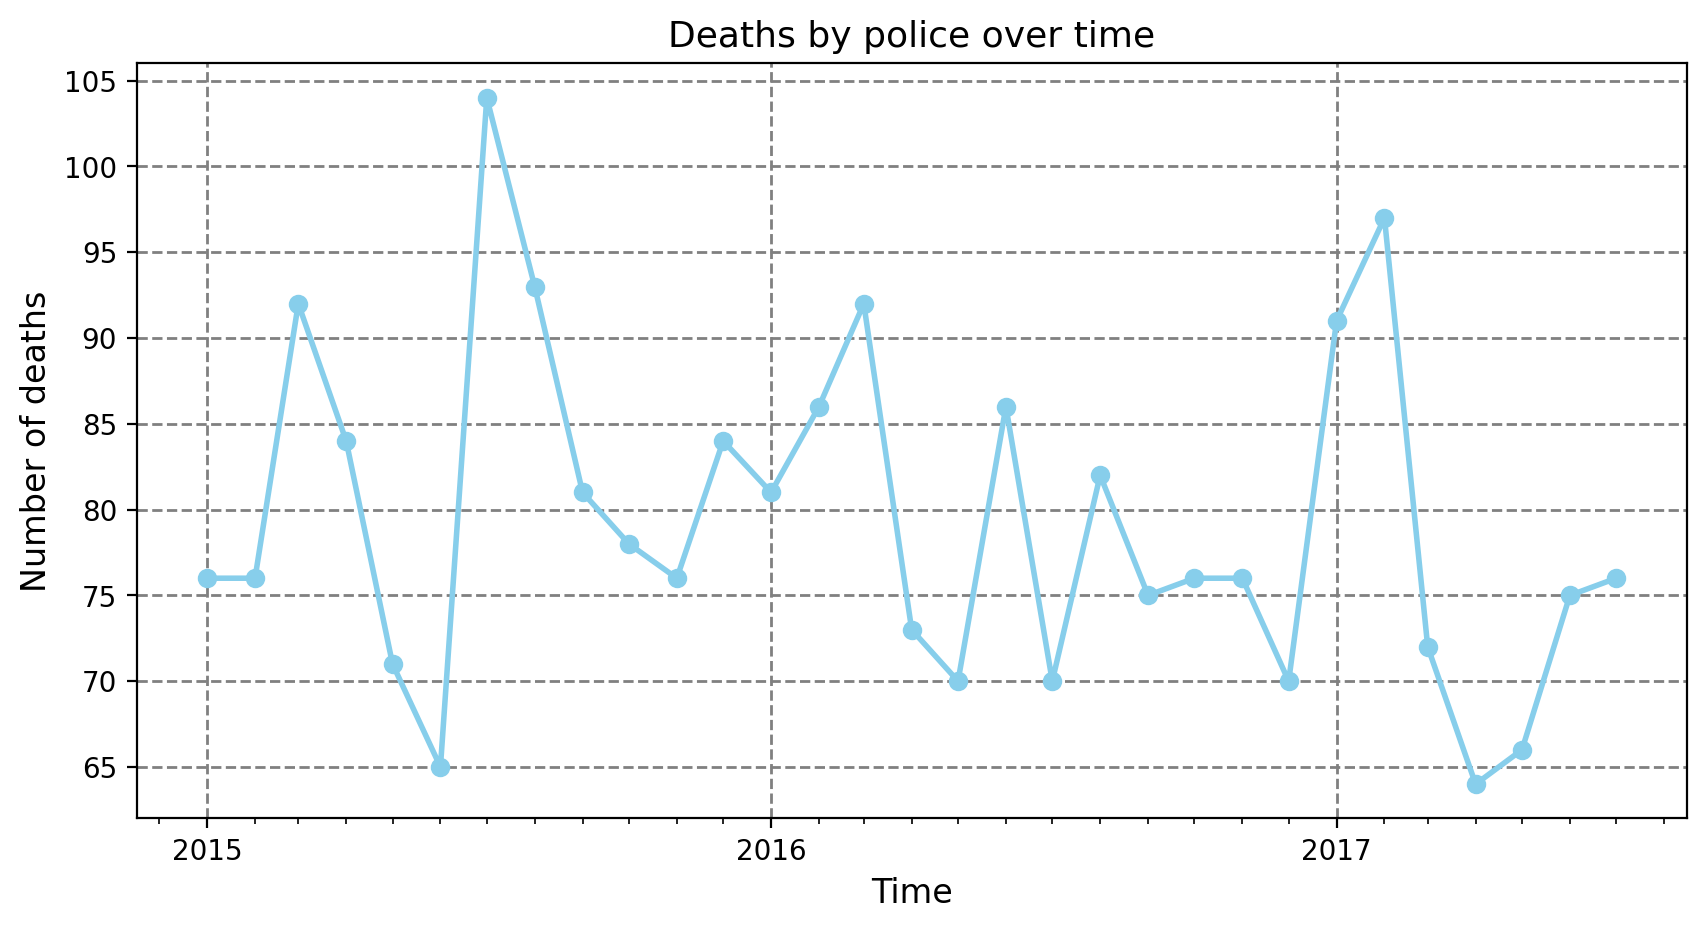

In [ ]:
plt.figure(figsize=(10,5), dpi=200) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=0)
plt.title("Deaths by police over time", fontsize=13)

plt.plot(fatalities_by_month["year_month"], fatalities_by_month["deaths"], linewidth=2, color="skyblue", marker="o")

plt.xlabel("Time", fontsize=12)
plt.ylabel("Number of deaths", fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='grey')
# plt.xlim(fatalities_by_month.year_month.min(), fatalities_by_month.year_month.max())
# plt.legend(loc="upper left")

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

axis = plt.gca()
axis.xaxis.set_major_locator(years)
axis.xaxis.set_major_formatter(years_fmt)
axis.xaxis.set_minor_locator(months)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).